跟踪器: ![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FApplied+Forecasting&file=BigQuery+Time+Series+Forecasting+Data+Review+and+Preparation.ipynb)
<!--- 表头 --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20Forecasting/BigQuery%20Time%20Series%20Forecasting%20Data%20Review%20and%20Preparation.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>在<br>Colab 中运行
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FApplied%2520Forecasting%2FBigQuery%2520Time%2520Series%2520Forecasting%2520Data%2520Review%2520and%2520Preparation.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>在<br>Colab Enterprise 中运行
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20Forecasting/BigQuery%20Time%20Series%20Forecasting%20Data%20Review%20and%20Preparation.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>在<br>GitHub 上查看
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Applied%20Forecasting/BigQuery%20Time%20Series%20Forecasting%20Data%20Review%20and%20Preparation.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>在<br>Vertex AI Workbench 中打开
    </a>
  </td>
</table>

时间序列预测 - 在BigQuery中进行数据审查

这是[应用预测](./readme.md)系列中的第一个笔记本！本笔记本将查看具有时间元素、随时间变化的需求信号和影响需求的协变量的数据源。将介绍用于探索和准备在本系列中所有其他笔记本中使用的数据的方法的细节。在预测的数据审查中，一个核心概念是通过[Plotly](https://plotly.com/python/)和[matplotlib](https://matplotlib.org/)可视化随时间变化的趋势，在这里将会展开。在本笔记本中开发的可视化效果将被重复使用并扩展到其他笔记本中。

**数据源：纽约市Citibike租车**

本系列使用了纽约市的Citibike租车情况。将选择靠近中央公园的自行车站，并跟踪这些站点出发的每日自行车行程数量随时间变化的情况。这将阐明一些常见的预测问题，因为随着时间的推移会引入新的站点，一些站点只有最近几个月甚至几周的数据。数据可以在BigQuery的公共数据集中找到：
- `bigquery-public-data.new_york.citibike_trips`
- `bigquery-public-data.new_york.citibike_stations`

---

**系列概述**

[本系列](./readme.md)探讨了在Vertex AI、BigQuery ML和其他开源框架中进行预测。预测包括跟踪随时间变化的测量并探索趋势、季节性的影响（年、月、日等）、假期和特殊事件，希望利用这些见解来预测接近未来。一些方法还包括观测到的影响需求的测量，以理解这些关系并使预测更准确。

---

**先决条件：**
-  来自此存储库的无

**资源：**
- [BigQuery](https://cloud.google.com/bigquery/docs/introduction)
    - [BigQuery Python Client](https://cloud.google.com/python/docs/reference/bigquery/latest)
    - [SQL参考](https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax)
- 博客：[如何在BigQuery中进行时间序列预测](https://towardsdatascience.com/how-to-do-time-series-forecasting-in-bigquery-af9eb6be8159)
- 使用Python从BigQuery读取数据，此存储库中的笔记本：
    - [技巧/BigQuery - Python客户端](../Tips/BigQuery%20-%20Python%20Client.ipynb)
    - [01 - 数据源/01 - BigQuery - 表数据源](../01%20-%20Data%20Sources/01%20-%20BigQuery%20-%20Table%20Data%20Source.ipynb)
    - [03 - BigQuery ML (BQML)/BigQuery ML (BQML)简介](../03%20-%20BigQuery%20ML%20(BQML)/Introduction%20to%20BigQuery%20ML%20(BQML).ipynb)

**概念流程和工作流程**
<p align="center">
  <img alt="Conceptual Flow" src="../architectures/slides/afore1_arch.png" width="45%">
&nbsp; &nbsp; &nbsp; &nbsp;
  <img alt="Workflow" src="../architectures/slides/afore1_console.png" width="45%">
</p>

## Colab设置

要在Colab中运行此笔记本，请点击[![在Colab中打开](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20Forecasting/BigQuery%20Time%20Series%20Forecasting%20Data%20Review%20and%20Preparation.ipynb)并运行此部分中的单元格。否则，请跳过此部分。

此单元格将对GCP进行身份验证（按照弹出窗口中的提示）。

In [2]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [3]:
try:
    import google.colab
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
except Exception:
    pass

安装和API启用

客户端软件包可能需要在这个环境中安装。

### 安装（如有需要）

In [4]:
# tuples of (import name, install name)
packages = [
    ('plotly', 'plotly'),
    ('kaleido', 'kaleido')
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user

### 重新启动内核（如果安装发生）

重新启动内核后，代码提交可以从此后的下一个单元格开始。

In [5]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

## 设置

输入:

In [6]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [7]:
REGION = 'us-central1'
EXPERIMENT = 'forecasting-data'
SERIES = 'applied-forecasting'

BQ_PROJECT = PROJECT_ID
BQ_DATASET = SERIES.replace('-','_')
BQ_TABLE = EXPERIMENT

viz_limit = 12

包裹:

In [60]:
from google.cloud import bigquery

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

客户:

In [10]:
bq = bigquery.Client(project = PROJECT_ID)

数据设置

### 创建 BigQuery 数据集
如果在该项目中缺少数据集，则创建一个 BigQuery 数据集：
- [参考链接](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.dataset.Dataset.html#google.cloud.bigquery.dataset.Dataset)

In [11]:
ds = bigquery.Dataset(f"{PROJECT_ID}.{BQ_DATASET}")
ds.location = 'us' #Multi-region is REGION[0:2]
ds.labels = {'notebook': f"{EXPERIMENT}"}
ds = bq.create_dataset(dataset = ds, exists_ok = True)

In [12]:
ds.dataset_id

'applied_forecasting'

In [13]:
ds.full_dataset_id

'statmike-mlops-349915:applied_forecasting'

列出项目中的BigQuery数据集:

In [14]:
datasets = list(bq.list_datasets())
for d in datasets:
    print(d.dataset_id)

BQML
applied_forecasting
applied_forecasting_pipeline_bqml_arimaplus
applied_genai
applied_genai_v2
bigframes_temp_us
bigframes_temp_us_central1
bqml
bqml_remote_model_tutorial
crossvalidation
explained_columns
feature_engineering
forecasting_8_tournament
forecasting_demo_prophet_vw3eqr84
fraud
github_api
model_deployment_monitoring_5876762107113897984
tmp_4126828053735145472_2023_12_13T17_40_00_684Z
working_with_docai


### 检查源数据
存储在BigQuery公共数据集中

快速预览:

In [15]:
query = f"""
    SELECT * 
    FROM `bigquery-public-data.new_york.citibike_trips`
    LIMIT 5
"""
bq.query(query).to_dataframe()

tripduration                 starttime                  stoptime  \
0          1335 2016-07-23 10:16:35+00:00 2016-07-23 10:38:51+00:00   
1          1491 2016-07-26 11:44:14+00:00 2016-07-26 12:09:05+00:00   
2           609 2016-09-24 07:51:17+00:00 2016-09-24 08:01:27+00:00   
3          2245 2016-08-28 16:06:06+00:00 2016-08-28 16:43:32+00:00   
4          1474 2016-06-25 09:56:38+00:00 2016-06-25 10:21:12+00:00   

   start_station_id start_station_name  start_station_latitude  \
0              3122      48 Ave & 5 St               40.744363   
1              3122      48 Ave & 5 St               40.744363   
2              3122      48 Ave & 5 St               40.744363   
3              3122      48 Ave & 5 St               40.744363   
4              3122      48 Ave & 5 St               40.744363   

   start_station_longitude  end_station_id               end_station_name  \
0               -73.955873             520                W 52 St & 5 Ave   
1               -73.955873             520                W 52 St & 5 Ave   
2               -73.955873            3102        Driggs Ave & Lorimer St   
3               -73.955873             416  Cumberland St & Lafayette Ave   
4               -73.955873             305                E 58 St & 3 Ave   

   end_station_latitude  end_station_longitude  bikeid    usertype  \
0             40.759923             -73.976485   24865  Subscriber   
1             40.759923             -73.976485   25903  Subscriber   
2             40.721791             -73.950415   25001  Subscriber   
3             40.687534             -73.972652   26015  Subscriber   
4             40.760958             -73.967245   23305    Customer   

   birth_year   gender  
0        1989     male  
1        1989     male  
2        1972     male  
3        1975     male  
4        <NA>  unknown

In [16]:
query = f"""
    SELECT * 
    FROM `bigquery-public-data.new_york.citibike_stations`
    LIMIT 5
"""
bq.query(query).to_dataframe()

station_id                        name short_name   latitude  longitude  \
0        495            W 47 St & 10 Ave    6824.07  40.762699 -73.993012   
1       3171     Amsterdam Ave & W 82 St    7360.10  40.785247 -73.976673   
2       3603              31 Ave & 30 St    6857.09  40.764700 -73.924031   
3       3733          Avenue C & E 18 St    5769.04  40.730563 -73.973984   
4       3792  Columbus Dr at Exchange Pl      JC106  40.716870 -74.032810   

   region_id   rental_methods  capacity  eightd_has_key_dispenser  \
0         71  KEY, CREDITCARD         0                     False   
1         71  KEY, CREDITCARD         0                     False   
2         71  KEY, CREDITCARD         0                     False   
3         71  KEY, CREDITCARD         0                     False   
4         70  KEY, CREDITCARD         0                     False   

   num_bikes_available  num_bikes_disabled  num_docks_available  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   

   num_docks_disabled  is_installed  is_renting  is_returning  \
0                   0          True        True          True   
1                   0         False       False         False   
2                   0         False       False         False   
3                   0         False       False         False   
4                   0         False       False         False   

   eightd_has_available_keys             last_reported  
0                      False 1970-01-02 00:00:00+00:00  
1                      False 1970-01-02 00:00:00+00:00  
2                      False 1970-01-02 00:00:00+00:00  
3                      False 1970-01-02 00:00:00+00:00  
4                      False 1970-01-02 00:00:00+00:00

检查两个源表之间车站名称不匹配的情况：

In [17]:
query = """
    WITH
        STATIONS AS (
            SELECT distinct name as stations
            FROM `bigquery-public-data.new_york.citibike_stations`
            WHERE name LIKE '%Central Park%'
        ),
        TRIPS AS (
            SELECT distinct start_station_name as trips
            FROM `bigquery-public-data.new_york.citibike_trips`
            WHERE start_station_name LIKE '%Central Park%'   
        )
    SELECT *
    FROM STATIONS a
    FULL JOIN TRIPS b
    on a.stations = b.trips
"""
bq.query(query).to_dataframe()

stations  \
0                        Central Park W & W 91 St   
1                          Central Park S & 6 Ave   
2                                            None   
3                       Central Park W & W 103 St   
4                     Central Park West & W 76 St   
5                                            None   
6                    W 106 St & Central Park West   
7                     Central Park West & W 85 St   
8               Grand Army Plaza & Central Park S   
9                     Central Park West & W 72 St   
10                    W 82 St & Central Park West   
11                                           None   
12  Central Park North & Adam Clayton Powell Blvd   
13                     7 Ave & Central Park South   
14                       Central Park W & W 97 St   
15                    Central Park West & W 68 St   

                                            trips  
0                                            None  
1                          Central Park S & 6 Ave  
2                    Central Park West & W 100 St  
3                                            None  
4                     Central Park West & W 76 St  
5                        Central Park W & W 96 St  
6                    W 106 St & Central Park West  
7                     Central Park West & W 85 St  
8               Grand Army Plaza & Central Park S  
9                     Central Park West & W 72 St  
10                    W 82 St & Central Park West  
11                   Central Park West & W 102 St  
12  Central Park North & Adam Clayton Powell Blvd  
13                                           None  
14                                           None  
15                    Central Park West & W 68 St

创建一个源表或视图
通常需要将多个来源组合在一起，以汇集所有预测所需的数据。在这里，引用多个源表来创建一个合并的预测源表。

目标是每个时间序列的一个时间点一行。这意味着将交易汇总成每个时间序列和每个时间点（日，月，季度，...）的需求信号。

如果用于预测的所有数据已经准备好，那么可能不需要类似这样的语句。将这些代码适应您的情况可能会很简单，例如：

```SQL
CREATE OR REPLACE VIEW `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_source` AS
SELECT *
FROM {BQ_SOURCE}
```

In [18]:
# CUSTOMIZE
query = f"""
CREATE OR REPLACE TABLE `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_source` AS
WITH
    STATION AS (
        SELECT
           start_station_name,
           EXTRACT(DATE FROM starttime) AS starttime,
           COUNT(*) AS num_trips,
           AVG(tripduration) as avg_tripduration,
           COUNTIF(usertype='Subscriber')/COUNT(*) as pct_subscriber,
           SAFE_DIVIDE(COUNTIF(gender='male'), COUNTIF(gender!='male')) as ratio_gender
        FROM `bigquery-public-data.new_york.citibike_trips`
        WHERE start_station_name LIKE '%Central Park%'
        GROUP BY start_station_name, starttime
    ),
    STATION_INFO AS (
        SELECT
            name,
            max(capacity) as capacity
        FROM `bigquery-public-data.new_york.citibike_stations`
        WHERE name LIKE '%Central Park%'
        GROUP BY name
    )
SELECT * EXCEPT(name)
FROM STATION A
LEFT OUTER JOIN STATION_INFO B
ON A.start_station_name = B.name
ORDER BY start_station_name, starttime
"""
job = bq.query(query = query)
job.result()
(job.ended-job.started).total_seconds()

4.347

In [19]:
print(f'Review The Source Data in The BigQuery Console:\nhttps://console.cloud.google.com/bigquery?project={PROJECT_ID}&ws=!1m5!1m4!4m3!1s{BQ_PROJECT}!2s{BQ_DATASET}!3s{BQ_TABLE}_source&pli=1')

Review The Source Data in The BigQuery Console:
https://console.cloud.google.com/bigquery?project=statmike-mlops-349915&ws=!1m5!1m4!4m3!1sstatmike-mlops-349915!2sapplied_forecasting!3sforecasting-data_source&pli=1


为预测准备数据

用于[cte](https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax#simple_cte)的参数和常见查询。

**单变量预测**仅包括每个时间序列的两列：
- `TARGET_COLUMN` = 需求测量。
    在我们的案例中，它是每天从特定自行车站出发的骑行次数 - 一天的总骑行次数。
- `TIME_COLUMN` = 需求的时间。
    以与预测练习的粒度相关的时间或日期单位表示。在我们的案例中，需求是每天测量的，所以时间列准备为日期。

**附加列**用于指导数据的预测算法处理：
- `SERIES_COLUMN`将与相同时间序列相关的行分组。
    - 进行多次预测，每个时间序列一个，意味着包括第三列来捕获每个时间序列的行组：`SERIES_COLUMN`。
    - **注意：**BigQuery ARIMA+为这些组中的每一个拟合一个单独的预测。在我们的案例中，这是`start_station_name`，它是在中央公园附近每个单独Citibike站的名称。
- `SPLITS_COLUMN`将每个时间序列内的顺序行分组以便在预测练习中使用。
    - 这些数据在预先准备的笔记本中为`TRAIN`、`VALIDATE`和`TEST`进行了分割。包含这些分割的列可以在训练过程中由所选的预测方法使用，而不是让方法计算分割。在比较多种不同方法时，这样做可以确保每种方法处理分割的方式保持一致。
- `COVARIATE_COLUMNS`是一个列的列表，用于测量随时间变化的其他特征。一些预测方法可以使用这些来提升对趋势的理解并做出更好的预测。单变量预测方法将不使用这些。要用协变量进行预测，其值需要事先知道，以便在进行预测时使用，否则预测方法将需要对未知的协变量进行特殊处理。有三种类型的协变量信息：
    - 属性
        - 在时间上不会改变但描述时间序列代表什么的值。在我们的案例中，自行车站可以通过纬度和经度、颜色、自行车槽位数量来识别。
    - 预测时可用的协变量（提前）
        - 这些是可以提前知道的测量，比如节假日发生的时间，促销活动，事件，容量变化。
    - 预测时不可用的协变量（提前）
        - 在时间上变化但在测量时间之前不知道的测量，比如雨水、其他天气、人流量和队列长度。

In [20]:
# CUSTOMIZE THIS CELL
TARGET_COLUMN = 'num_trips'
TIME_COLUMN = 'starttime'
SERIES_COLUMN = 'start_station_name'
SPLIT_COLUMN = 'splits'
COVARIATE_COLUMNS = ['avg_tripduration', 'pct_subscriber', 'ratio_gender', 'capacity'] # could be empty

每个系列的总数和日期范围的快速总结：

In [21]:
query = f"""
    SELECT {SERIES_COLUMN}, sum({TARGET_COLUMN}) as {TARGET_COLUMN}, min({TIME_COLUMN}) as FromDate, max({TIME_COLUMN}) as ToDate
    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_source`
    GROUP BY {SERIES_COLUMN}
    ORDER BY {SERIES_COLUMN}
"""
overview = bq.query(query).to_dataframe()
overview.head(viz_limit)

start_station_name  num_trips    FromDate  \
0   Central Park North & Adam Clayton Powell Blvd       4808  2016-09-01   
1                          Central Park S & 6 Ave     172220  2013-07-01   
2                        Central Park W & W 96 St       5905  2016-08-04   
3                    Central Park West & W 100 St       2245  2016-08-08   
4                    Central Park West & W 102 St       2851  2016-08-08   
5                     Central Park West & W 68 St      35192  2015-09-01   
6                     Central Park West & W 72 St      44574  2015-09-01   
7                     Central Park West & W 76 St      27919  2015-09-09   
8                     Central Park West & W 85 St      43895  2015-10-07   
9               Grand Army Plaza & Central Park S     163815  2013-07-01   
10                   W 106 St & Central Park West       4076  2016-08-11   
11                    W 82 St & Central Park West      18216  2015-09-29   

        ToDate  
0   2016-09-30  
1   2016-09-30  
2   2016-09-30  
3   2016-09-30  
4   2016-09-30  
5   2016-09-30  
6   2016-09-30  
7   2016-09-30  
8   2016-09-23  
9   2016-09-30  
10  2016-09-30  
11  2016-09-30

可视化每个系列的日期/时间范围：

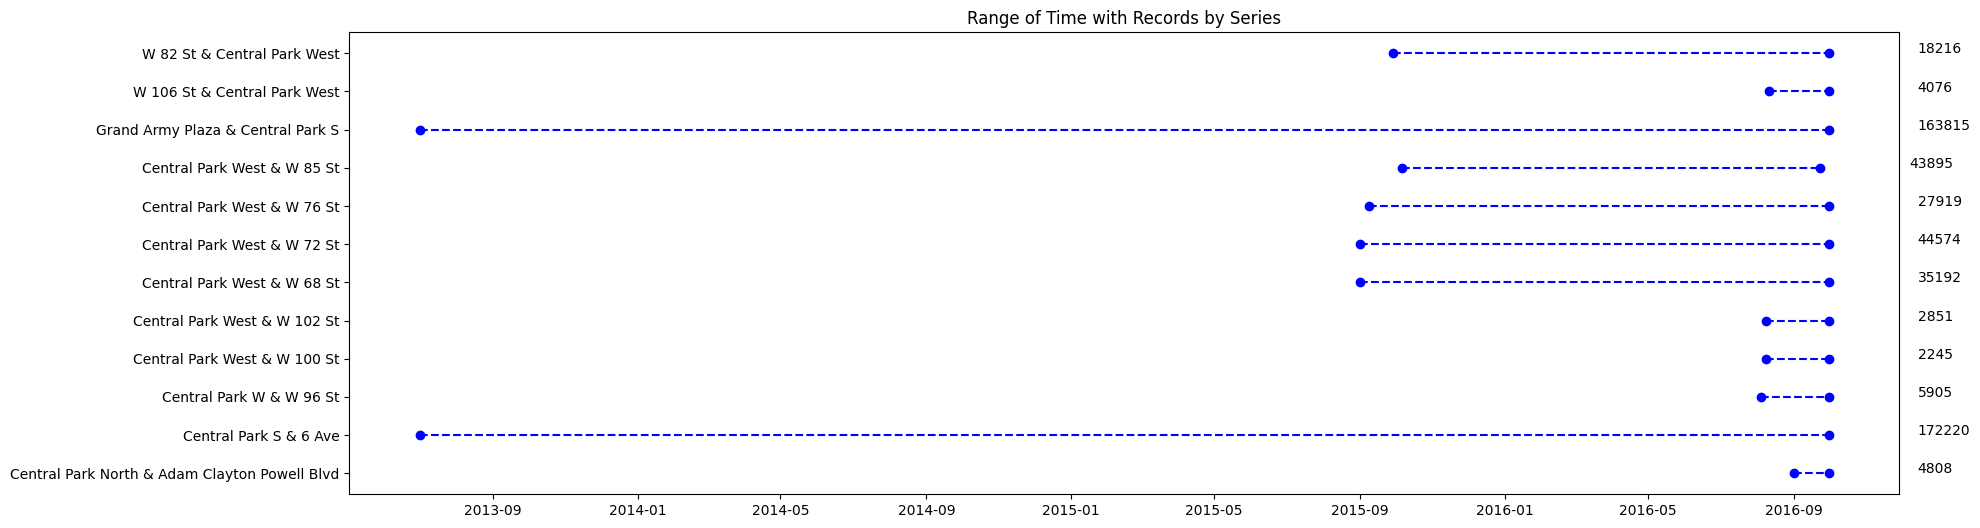

In [22]:
plt.figure(figsize=(20,6))
for i in range(viz_limit):
    x = [overview['FromDate'][i], overview['ToDate'][i]]
    y = [overview[SERIES_COLUMN][i], overview[SERIES_COLUMN][i]]
    plt.plot(x, y, 'bo', linestyle="--")
    plt.text(x[1]+timedelta(75), y[0], str(overview[TARGET_COLUMN][i]))
    plt.title('Range of Time with Records by Series')
plt.show()

在图表上叠加日期数据，以了解系列数据中的任何空白。

In [23]:
query = f"""
    SELECT DISTINCT {SERIES_COLUMN}, {TIME_COLUMN}
    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_source`
"""
dates = bq.query(query).to_dataframe()

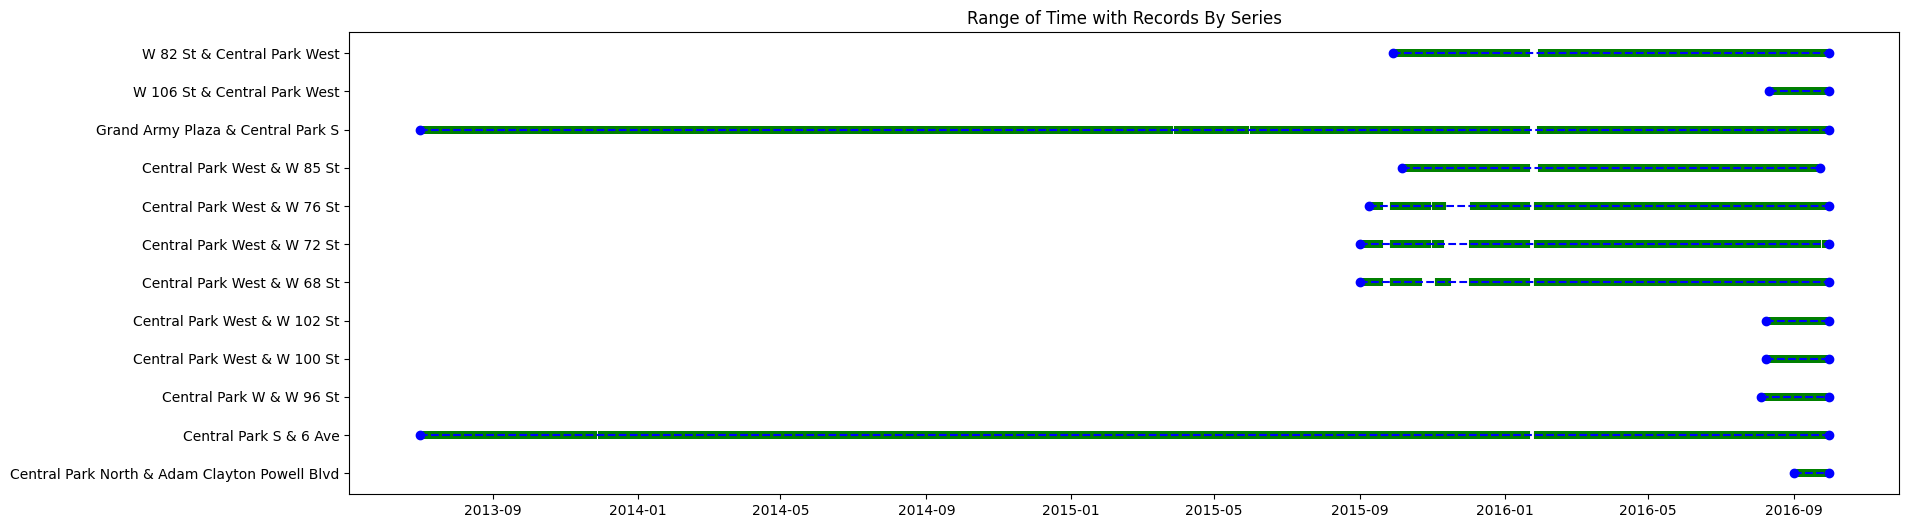

In [24]:
plt.figure(figsize=(20,6))
for i in range(viz_limit):
    x = [overview['FromDate'][i], overview['ToDate'][i]]
    y = [overview[SERIES_COLUMN][i], overview[SERIES_COLUMN][i]]
    plt.plot(x, y, 'bo', linestyle="--")
    # subset dates to current series and plot dates with records on timelines for each series:
    tempdates = dates[(dates[SERIES_COLUMN] == overview[SERIES_COLUMN][i])]
    plt.scatter(tempdates[TIME_COLUMN], tempdates[SERIES_COLUMN], c='g', marker='|')
    plt.title('Range of Time with Records By Series')
plt.show()

### 根据日期范围提出训练/验证/测试数据集的划分方案

从系列数据中获取关键日期，并设置预测时段：

**预测参数**：
- `FORECAST_GRANULARITY`是测量频率，例如分钟、小时、天、周、月、年
    - 数据在准备数据笔记本中以天级别进行了总结
    - 这是测量之间的时间间隔 - 行
    - 对于不同的粒度，您可能需要将需求信号汇总为不同时间组件的`SUM`、`MIN`、`MAX`或`AVERAGE`
    - 粒度的规范因方法而异：
        - BigQuery ML：每分钟、按小时、按日、按周、按月、按季度、按年
        - Prophet（包括Vertex预构建管道）：分钟、小时、天、周、月或年
        - Vertex AI AutoML：分钟、小时、天、周、月、年
    - 一个非常有用的BigQuery函数用于提取时间和日期的组件是`EXTRACT`函数：
        - [EXTRACT作为日期函数](https://cloud.google.com/bigquery/docs/reference/standard-sql/date_functions#extract)
        - [EXTRACT作为时间函数](https://cloud.google.com/bigquery/docs/reference/standard-sql/time_functions#extract)
        - [EXTRACT作为日期时间函数](https://cloud.google.com/bigquery/docs/reference/standard-sql/datetime_functions#extract)
- `FORECAST_TEST_LENGTH`是分配给测试区域的行数
    - 这是以`FORECAST_GRANULARITY`为单位的
    - 数据准备包括设置此项以指定`SERIES_COLUMN`中每个时间序列的`SPLITS_COLUMN='TEST'`值
- `FORCAST_VALIDATE_LENGTH`是分配给验证区域的行数
    - 这是以`FORECAST_GRANULARITY`为单位的
    - 数据准备包括设置此项以指定`SERIES_COLUMN`中每个时间序列的`SPLITS_COLUMN='VALIDATE'`值
- `FORECAST_HORIZON_LENGTH`是要预测未来超出测试区域的行数
    - 这是以`FORECAST_GRANULARITY`为单位的
    - 这需要作为预测方法的输入进行设置。

In [25]:
# CUSTOMIZE
FORECAST_GRANULARITY = 'DAY' # the data preparation included preparing the data at this level
FORECAST_HORIZON_LENGTH = 14
FORECAST_TEST_LENGTH = 14 # the data preparation included setting this value for splits = TEST
FORECAST_VALIDATE_LENGTH = 14 # the data preparation included setting this value for splits = VALIDATE

In [26]:
query = f"""
    SELECT 
        MIN({TIME_COLUMN}) as start_date,
        DATE_SUB(MAX({TIME_COLUMN}), INTERVAL {FORECAST_TEST_LENGTH + FORECAST_VALIDATE_LENGTH}-1 DAY) as val_start,
        DATE_SUB(MAX({TIME_COLUMN}), INTERVAL {FORECAST_TEST_LENGTH}-1 DAY) as test_start,
        MAX({TIME_COLUMN}) as end_date
    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_source`  
"""
keyDates = bq.query(query).to_dataframe()
keyDates

start_date   val_start  test_start    end_date
0  2013-07-01  2016-09-03  2016-09-17  2016-09-30

用提议的数据段来展示每个系列的日期/时间范围。

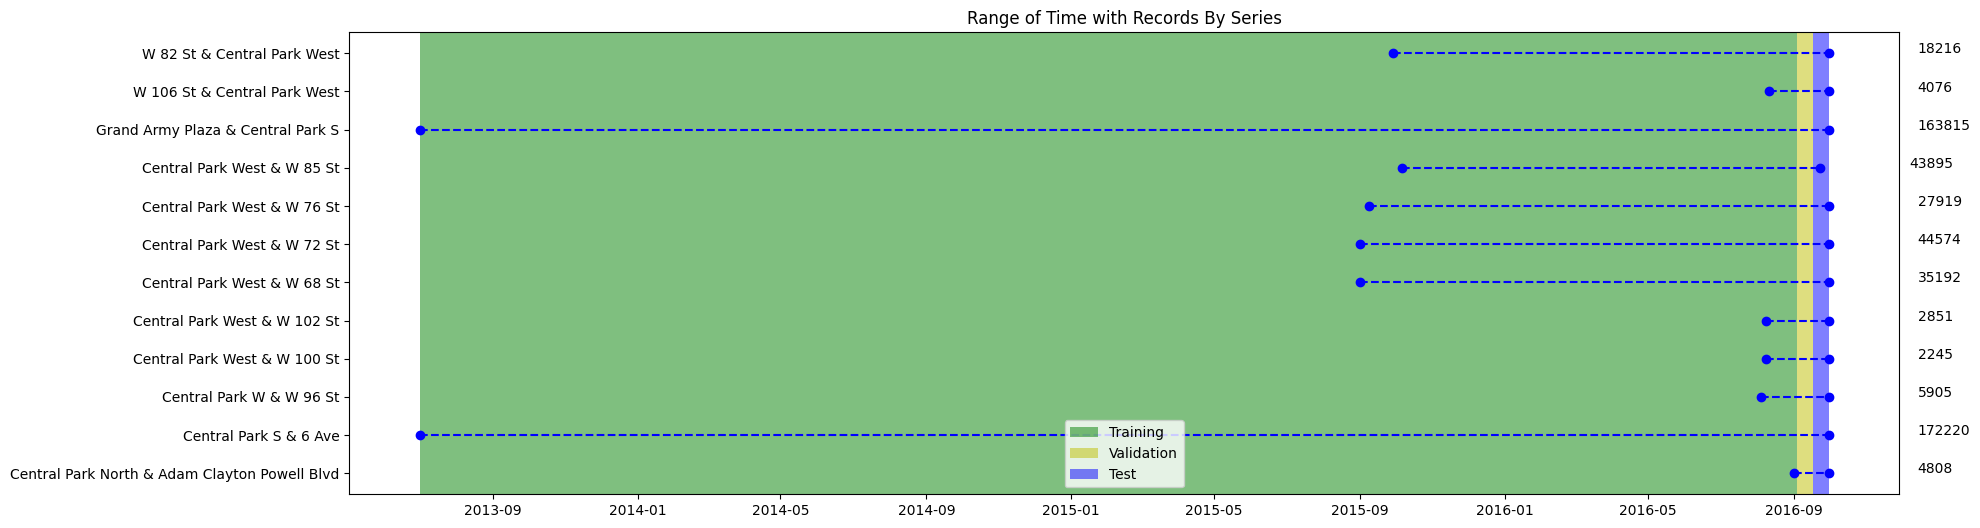

In [27]:
plt.figure(figsize=(20,6))
for i in range(viz_limit):
    x = [overview['FromDate'][i], overview['ToDate'][i]]
    y = [overview[SERIES_COLUMN][i], overview[SERIES_COLUMN][i]]
    plt.plot(x, y, 'bo', linestyle="--")
    plt.text(x[1]+timedelta(75), y[0], str(overview[TARGET_COLUMN][i]))
    plt.title('Range of Time with Records By Series')
plt.axvspan(keyDates['start_date'][0], keyDates['val_start'][0], facecolor='g', alpha = 0.5, label = 'Training')
plt.axvspan(keyDates['val_start'][0], keyDates['test_start'][0], facecolor='y', alpha = 0.5, label = 'Validation')
plt.axvspan(keyDates['test_start'][0], keyDates['end_date'][0], facecolor='b', alpha = 0.5, label = 'Test')
plt.legend(loc = 'lower center')
plt.show()

为预测创建BigQuery表格
把所有的东西都放在一起吧！

In [28]:
query = f"""
    CREATE OR REPLACE TABLE `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_prepped` AS
    SELECT *,
       CASE
           WHEN {TIME_COLUMN} > DATE_SUB((SELECT MAX({TIME_COLUMN}) FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_source`), INTERVAL {FORECAST_TEST_LENGTH} {FORECAST_GRANULARITY}) THEN "TEST"
           WHEN {TIME_COLUMN} > DATE_SUB((SELECT MAX({TIME_COLUMN}) FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_source`), INTERVAL {FORECAST_TEST_LENGTH} + {FORECAST_VALIDATE_LENGTH} {FORECAST_GRANULARITY}) THEN "VALIDATE"
           ELSE "TRAIN"
       END AS {SPLIT_COLUMN}
    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_source`
"""
job = bq.query(query)
job.result()
(job.ended-job.started).total_seconds()

4.193

In [29]:
print(f'Review The Prepped Data in The BigQuery Console:\nhttps://console.cloud.google.com/bigquery?project={PROJECT_ID}&ws=!1m5!1m4!4m3!1s{BQ_PROJECT}!2s{BQ_DATASET}!3s{BQ_TABLE}_prepped&pli=1')

Review The Prepped Data in The BigQuery Console:
https://console.cloud.google.com/bigquery?project=statmike-mlops-349915&ws=!1m5!1m4!4m3!1sstatmike-mlops-349915!2sapplied_forecasting!3sforecasting-data_prepped&pli=1


##审查预测数据

In [30]:
query = f"""
    SELECT 
        {SERIES_COLUMN},
        COUNTIF({SPLIT_COLUMN} = 'TRAIN') as TRAIN,
        COUNTIF({SPLIT_COLUMN} = 'VALIDATE') as VALIDATE,
        COUNTIF({SPLIT_COLUMN} = 'TEST') as TEST,
        sum({TARGET_COLUMN}) as {TARGET_COLUMN}
    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_prepped`
    GROUP BY {SERIES_COLUMN}
    ORDER BY {SERIES_COLUMN}
"""
splitCounts = bq.query(query).to_dataframe()
splitCounts.head(viz_limit)

start_station_name  TRAIN  VALIDATE  TEST  \
0   Central Park North & Adam Clayton Powell Blvd      2        14    14   
1                          Central Park S & 6 Ave   1149        14    14   
2                        Central Park W & W 96 St     30        14    14   
3                    Central Park West & W 100 St     26        14    14   
4                    Central Park West & W 102 St     26        14    14   
5                     Central Park West & W 68 St    331        14    14   
6                     Central Park West & W 72 St    334        14    13   
7                     Central Park West & W 76 St    327        14    14   
8                     Central Park West & W 85 St    324        14     7   
9               Grand Army Plaza & Central Park S   1152        14    13   
10                   W 106 St & Central Park West     23        14    14   
11                    W 82 St & Central Park West    331        14    14   

    num_trips  
0        4808  
1      172220  
2        5905  
3        2245  
4        2851  
5       35192  
6       44574  
7       27919  
8       43895  
9      163815  
10       4076  
11      18216

按数据分类的总计:

In [31]:
splitCounts[['TRAIN','VALIDATE','TEST']].sum()

TRAIN       4055
VALIDATE     168
TEST         159
dtype: int64

总体总数:

In [32]:
splitCounts[['TRAIN','VALIDATE','TEST']].sum().sum()

4382

在每个系列中可用于预测的数据天数进行可视化。

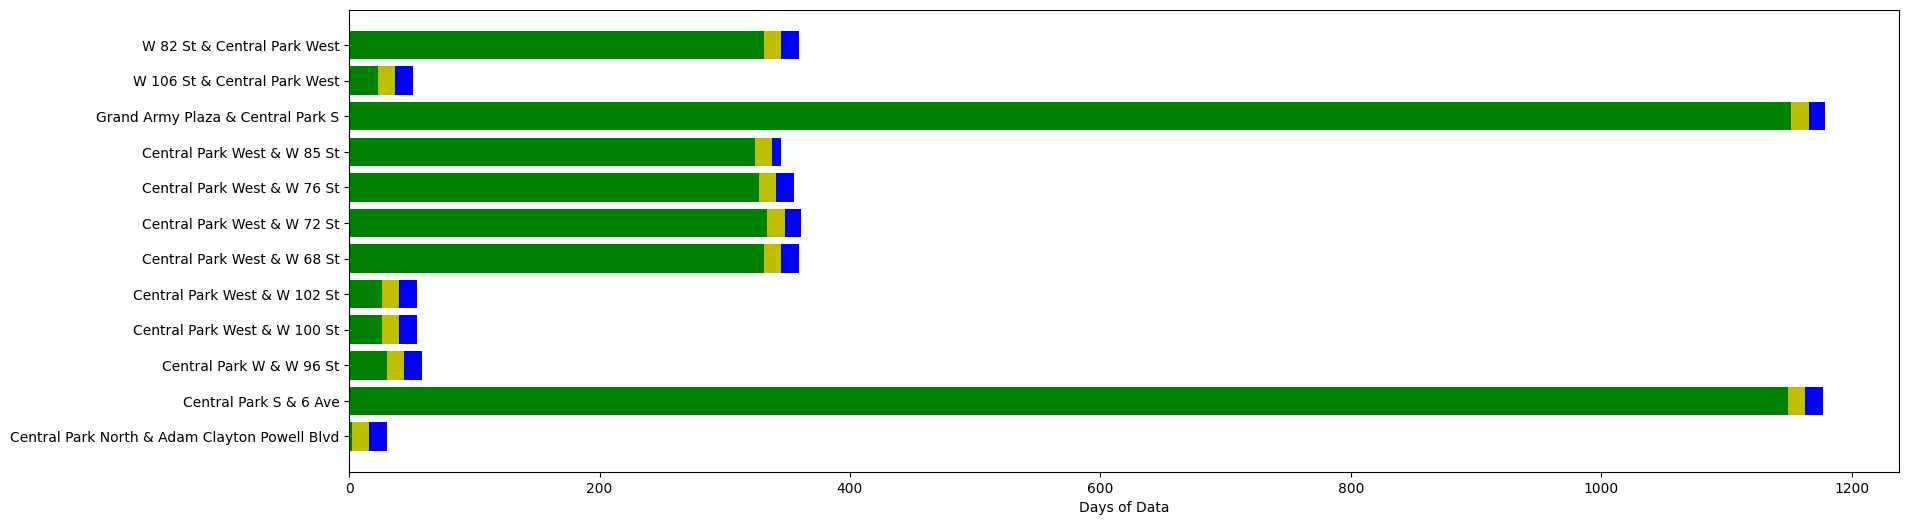

In [33]:
tempsplitCounts = splitCounts.iloc[0:viz_limit]
plt.figure(figsize=(20,6))
plt.barh(tempsplitCounts[SERIES_COLUMN], tempsplitCounts['TRAIN'], color = 'g')
plt.barh(tempsplitCounts[SERIES_COLUMN], tempsplitCounts['VALIDATE'], color = 'y', left = tempsplitCounts['TRAIN'])
plt.barh(tempsplitCounts[SERIES_COLUMN], tempsplitCounts['TEST'], color = 'b', left = tempsplitCounts['TRAIN'] + tempsplitCounts['VALIDATE'])
plt.xlabel('Days of Data')
plt.show()

验证检查：从源中提取分裂日期

In [34]:
query = f"""
    WITH
        SPLIT AS (
            SELECT splits, min({TIME_COLUMN}) as mindate, max({TIME_COLUMN}) as maxdate
            FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_prepped`
            GROUP BY {SPLIT_COLUMN}
        ),
        TRAIN AS (
            SELECT mindate as start_date
            FROM SPLIT
            WHERE {SPLIT_COLUMN} ='TRAIN'
        ),
        VAL AS (
            SELECT mindate as val_start
            FROM SPLIT
            WHERE {SPLIT_COLUMN} = 'VALIDATE'
        ),
        TEST AS (
            SELECT mindate as test_start, maxdate as end_date
            FROM SPLIT
            WHERE {SPLIT_COLUMN} = 'TEST'
        )
    SELECT * EXCEPT(pos) FROM
    (SELECT *, ROW_NUMBER() OVER() pos FROM TRAIN)
    JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM VAL)
    USING (pos)
    JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM TEST)
    USING (pos)
"""
keyDates = bq.query(query).to_dataframe()
keyDates

start_date   val_start  test_start    end_date
0  2013-07-01  2016-09-03  2016-09-17  2016-09-30

生效检查：系列中是否有重复日期？
是否有包含重复日期数据的系列？

In [35]:
query = f"""
    WITH
        DAYS AS (
            SELECT {SERIES_COLUMN}, {TIME_COLUMN}, count(*) as records
            FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_prepped`
            GROUP BY {SERIES_COLUMN}, {TIME_COLUMN}
        )
    SELECT *
    FROM DAYS
    WHERE records > 1
"""
bq.query(query).to_dataframe()

Empty DataFrame
Columns: [start_station_name, starttime, records]
Index: []

时间序列回顾

In [36]:
query = f"""
    SELECT 
        {SERIES_COLUMN}, {TIME_COLUMN}, {TARGET_COLUMN}, {SPLIT_COLUMN},
        {', '.join(COVARIATE_COLUMNS)}
    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_prepped`
    ORDER by {SERIES_COLUMN}, {TIME_COLUMN}
"""
rawSeries = bq.query(query).to_dataframe()

### 绘制时间序列

使用 [Plotly](https://plotly.com/python/) 创建一个交互式图表，用于查看单个时间序列（自行车站点），并通过滚动来浏览时间范围。

In [61]:
# NA values in Pandas will not convert to JSON which Plotly uses:
rawSeries = rawSeries.fillna(np.nan).replace([np.nan], [None])

# create a figure:
fig = go.Figure()

# get a list of colors to use:
colors = px.colors.qualitative.Plotly

# list of columns to plot over time : target and covariates
variables = [TARGET_COLUMN] + COVARIATE_COLUMNS

# create dropdown/button to toggle series
buttons = []
b = 0 # default button index

# iterate through series:
series = rawSeries[SERIES_COLUMN].unique().tolist()[0:viz_limit]
for s in series:
    # iterate trhough columns
    for y, v in enumerate(variables):
        fig.add_trace(
            go.Scatter(
                x = rawSeries[rawSeries[SERIES_COLUMN]==s][TIME_COLUMN],
                y = rawSeries[rawSeries[SERIES_COLUMN]==s][v],
                name = f'{v}',
                text = rawSeries[rawSeries[SERIES_COLUMN]==s][v],
                yaxis = f"y{y+1}",
                hoverinfo='name+x+text',
                line = {'width': 0.5},
                marker = {'size': 8},
                mode = 'lines+markers',
                showlegend = False,
                visible = (b==0) # make a series visible as default: this uses the first series
            )
        )
    
    # which button to show:
    ff = 0 # count of forecast related traces add to each series
    which_buttons = [False] * len(series) * (len(variables) + ff)
    which_buttons[b * (len(variables) +ff):(b+1)*(len(variables) + ff)] = [True] * (len(variables) + ff)

    # create button for series:
    button = dict(
        label = s,
        method = 'update',
        args = [{'visible': which_buttons}]
    )
    buttons.append(button)
    b += 1

# add split regions: training
fig.add_shape(
    fillcolor = 'rgba(0, 255, 0, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['start_date'][0],
    x1 = keyDates['val_start'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['val_start'][0] - (keyDates['test_start'][0]-keyDates['val_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Training',
    yanchor = 'bottom'
)

# add split regions: validation
fig.add_shape(
    fillcolor = 'rgba(255, 255, 0, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['val_start'][0],
    x1 = keyDates['test_start'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['val_start'][0] + (keyDates['test_start'][0]-keyDates['val_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Validation',
    yanchor = 'bottom'
)

# add split regions: test
fig.add_shape(
    fillcolor = 'rgba(0, 0, 255, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['test_start'][0],
    x1 = keyDates['end_date'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['test_start'][0] + (keyDates['end_date'][0]-keyDates['test_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Test',
    yanchor = 'bottom'
)

# configure axes layout:
layout = dict(
    xaxis =  dict(
        range = [keyDates['end_date'][0] - 2*(keyDates['end_date'][0] - keyDates['val_start'][0]), keyDates['end_date'][0]],
        rangeslider = dict(
            autorange = True,
            range = [keyDates['start_date'][0], keyDates['end_date'][0]]
        ),
        type = 'date'
    )
)
for v, variable in enumerate(variables):
    layout[f'yaxis{v+1}'] = dict(
        anchor = 'x',
        domain = [v*(1/len(variables)), (v+1)*(1/len(variables))],
        autorange = True,
        mirror = True,
        autoshift = True,
        title = dict(text = variable, standoff = 10 + 20 * (v % 2), font = dict(color = colors[v])),
        tickfont = dict(color = colors[v]),
        tickmode = 'auto',
        linecolor = colors[v],
        linewidth = 4,
        showline = True,
        side = 'right',
        type = 'linear',
        zeroline = False
    )

# final update of display before rendering
fig.update_layout(
    layout,
    title = 'Time Series Plots:',
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=600,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100
    ),
    updatemenus = [
        dict(
            buttons = buttons,
            type = 'dropdown',
            direction = 'down',
            x = 1,
            y = 1.2,
            showactive = True
        )
    ]
)

# render the interactive plot:
fig.show()

上面的可视化是动态的，可以选择时间范围，并且可以下拉选择单个时间序列。加载这个笔记本在类似Jupyter或VSCode的视图中与之交互。 下面显示的是一个静态版本，供参考：

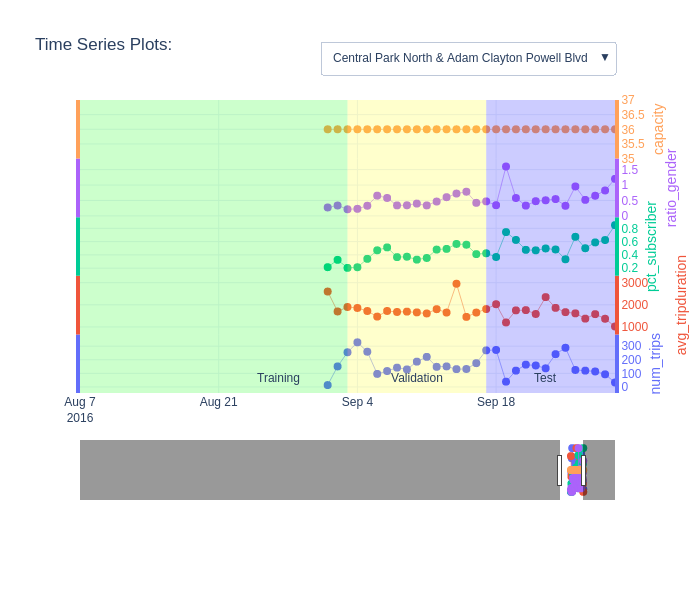

In [62]:
fig.show('png')

移除资源
请查看笔记本“99 - 清理”